<a href="https://colab.research.google.com/github/magubane94/Integrated_Project/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Titanic challenge

In [1]:
import pandas as pd
import numpy as np

In [2]:
#load the dataframes
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [3]:
#EDA
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#check the nulls
train_df.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#check for the number of null values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#check the data types of columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#check the number summary
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#check the mode of the columns that have null values
train_df['Cabin'].mode()[0]

'B96 B98'

In [ ]:
cabin_mode = train_df['Cabin'].mode()[0]

In [ ]:
#max_mode_Cabin = train_df['Cabin'].mode().max()

In [ ]:
#min_mode_Cabin= train_df['Cabin'].mode().min()

In [ ]:
print(train_df['Cabin'].mode(dropna = False)[0])

nan


In [ ]:
train_df[train_df['Cabin']== 'B96 B98'].head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S


In [4]:
train_df['Age'].mode()[0]

24.0

In [5]:
age_mode = train_df['Age'].mode()[0]

In [6]:
embarked_mode = train_df['Embarked'].mode()[0]

In [7]:
print(f" the mode of 'embarked' is:{embarked_mode}")

 the mode of 'embarked' is:S


In [8]:
#feature engineering
train_df['Age'].fillna(age_mode, inplace = True)

In [9]:
train_df['Embarked'].fillna(embarked_mode, inplace = True)

In [ ]:
#train_df['Cabin'].fillna(cabin_mode, inplace = True)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
#We do not PassengerID and Name because they are insignifant in determining the survival of an individual
train_df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True )

In [ ]:
#train_df.drop(['Ticket'], axis = 1, inplace = True )

In [12]:
df_clean = train_df

In [13]:
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df_clean = pd.get_dummies(df_clean,columns =['Pclass'], drop_first = True)

In [29]:
df_clean.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [17]:
#Modeling packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [18]:
from sklearn.metrics import mean_squared_error

In [30]:
#feature selection
y = df_clean['Survived']

X = df_clean.drop(['Survived'], axis = 1)

In [31]:
#data split
X_train,X_test,y_train,y_test = train_test_split (X,y, test_size=20,random_state=42)

In [21]:
model = LogisticRegression()

In [ ]:
X_train_ = X_train.to_numpy()

In [ ]:
X_train = X_train_.reshape(-1,1)

In [32]:
#fit the model
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred = model.predict(X_test)

In [46]:
X_test.head(1)

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
709,24.0,1,1,15.2458,1,0,0,0,1


In [34]:
mse = mean_squared_error(y_test,y_pred)

In [35]:
print(f"Mean Squared Error is: {mse}")

Mean Squared Error is: 0.1


In [39]:
print(f" Accuracy score is: {accuracy_score(y_test,y_pred)}")

 Accuracy score is: 0.9


In [36]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


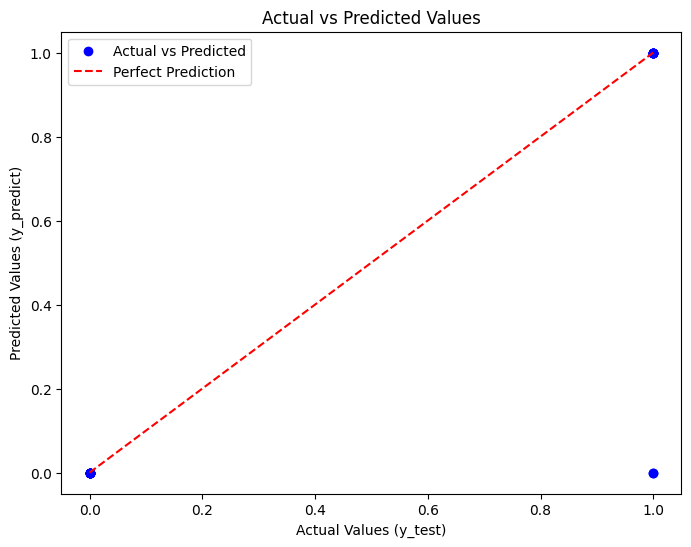

In [37]:
# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

# Adding labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_predict)')
plt.title('Actual vs Predicted Values')
plt.legend()

# Display the plot
plt.show()

In [49]:
test_df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True )

In [67]:
test_df = pd.get_dummies(test_df,columns =['Sex','Embarked','Pclass'], drop_first = True)

In [68]:
test_df.isnull().sum()

Age           86
SibSp          0
Parch          0
Fare           1
Sex_male       0
Embarked_Q     0
Embarked_S     0
Pclass_2       0
Pclass_3       0
dtype: int64

In [69]:
age_mode = test_df['Age'].mode()[0]

In [70]:
test_df['Age'].fillna(age_mode, inplace = True)

In [71]:
faremode = test_df['Fare'].mode()[0]

In [72]:
test_df['Fare'].fillna(faremode, inplace = True)

In [73]:
test_pred = model.predict(test_df)

In [41]:
#submit
df = pd.DataFrame({'PassengerId':test_df['PassengerId']})

In [76]:
df['Survived'] = test_pred

In [77]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [80]:
#save your results
df.to_csv('Submit.csv',index = False)

In [82]:
#save your model
from joblib import dump

In [83]:
dump(model,'Titanic_model.joblib')

['Titanic_model.joblib']

In [84]:
#load the saved model
from joblib import load

In [ ]:
loaded_model = load('/content/Titanic_model.joblib')

In [ ]:
# Now you can use 'loaded_model' to make predictions on new data
predictions = loaded_model.predict(new_data)